In [1]:
library("tidyverse", "lubridate", "ggthemes")

Warning message in library("tidyverse", "lubridate", "ggthemes"):
“‘ggthemes’ not found on search path, using pos = 2”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data <- read_csv("Korean_demographics_2000-2022.csv")

head(data)
glimpse(data)
str(data)

Rows: 4860 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Date, Region
dbl (10): Birth, Birth_rate, Death, Death_rate, Divorce, Divorce_rate, Marri...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/1/2000,Busan,3752,11.61,1875,5.8,814,2.5,2435,7.5,1877,5.8
1/1/2000,Chungcheongbuk-do,1903,15.06,924,7.3,220,1.7,828,6.6,979,7.7
1/1/2000,Chungcheongnam-do,2398,14.75,1466,9.0,321,2.0,1055,6.5,932,5.7
1/1/2000,Daegu,3057,14.39,1117,5.3,422,2.0,1577,7.4,1940,9.1
1/1/2000,Daejeon,1859,16.08,565,4.9,280,2.4,868,7.5,1294,11.2
1/1/2000,Gangwon-do,1966,14.91,1067,8.1,304,2.3,817,6.2,899,6.8


Rows: 4,860
Columns: 12
$ Date                <chr> "1/1/2000", "1/1/2000", "1/1/2000", "1/1/2000", "1…
$ Region              <chr> "Busan", "Chungcheongbuk-do", "Chungcheongnam-do",…
$ Birth               <dbl> 3752, 1903, 2398, 3057, 1859, 1966, 2159, 13527, 3…
$ Birth_rate          <dbl> 11.61, 15.06, 14.75, 14.39, 16.08, 14.91, 18.77, 1…
$ Death               <dbl> 1875, 924, 1466, 1117, 565, 1067, 606, 3770, 2230,…
$ Death_rate          <dbl> 5.8, 7.3, 9.0, 5.3, 4.9, 8.1, 5.3, 5.0, 9.4, 8.1, …
$ Divorce             <dbl> 814, 220, 321, 422, 280, 304, 212, 1931, 406, 577,…
$ Divorce_rate        <dbl> 2.5, 1.7, 2.0, 2.0, 2.4, 2.3, 1.8, 2.5, 1.7, 2.2, …
$ Marriage            <dbl> 2435, 828, 1055, 1577, 868, 817, 932, 5759, 1691, …
$ Marriage_rate       <dbl> 7.5, 6.6, 6.5, 7.4, 7.5, 6.2, 8.1, 7.6, 7.1, 8.0, …
$ Natural_growth      <dbl> 1877, 979, 932, 1940, 1294, 899, 1553, 9757, 1132,…
$ Natural_growth_rate <dbl> 5.8, 7.7, 5.7, 9.1, 11.2, 6.8, 13.5, 12.9, 4.8, 6.…
spec_tbl_df [4,8

In [3]:
head(data$Date, 25)

data$Date <- lubridate::mdy(data$Date)
str(data)

[1] "1/1/2000" "1/1/2000" "1/1/2000" "1/1/2000" "1/1/2000" "1/1/2000"
 [7] "1/1/2000" "1/1/2000" "1/1/2000" "1/1/2000" "1/1/2000" "1/1/2000"
[13] "1/1/2000" "1/1/2000" "1/1/2000" "1/1/2000" "1/1/2000" "1/1/2000"
[19] "2/1/2000" "2/1/2000" "2/1/2000" "2/1/2000" "2/1/2000" "2/1/2000"
[25] "2/1/2000"

spec_tbl_df [4,860 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date               : Date[1:4860], format: "2000-01-01" "2000-01-01" ...
 $ Region             : chr [1:4860] "Busan" "Chungcheongbuk-do" "Chungcheongnam-do" "Daegu" ...
 $ Birth              : num [1:4860] 3752 1903 2398 3057 1859 ...
 $ Birth_rate         : num [1:4860] 11.6 15.1 14.8 14.4 16.1 ...
 $ Death              : num [1:4860] 1875 924 1466 1117 565 ...
 $ Death_rate         : num [1:4860] 5.8 7.3 9 5.3 4.9 8.1 5.3 5 9.4 8.1 ...
 $ Divorce            : num [1:4860] 814 220 321 422 280 ...
 $ Divorce_rate       : num [1:4860] 2.5 1.7 2 2 2.4 2.3 1.8 2.5 1.7 2.2 ...
 $ Marriage           : num [1:4860] 2435 828 1055 1577 868 ...
 $ Marriage_rate      : num [1:4860] 7.5 6.6 6.5 7.4 7.5 6.2 8.1 7.6 7.1 8 ...
 $ Natural_growth     : num [1:4860] 1877 979 932 1940 1294 ...
 $ Natural_growth_rate: num [1:4860] 5.8 7.7 5.7 9.1 11.2 6.8 13.5 12.9 4.8 6.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character()

In [4]:
glimpse(data)
sum(is.na(data$Date))

Rows: 4,860
Columns: 12
$ Date                <date> 2000-01-01, 2000-01-01, 2000-01-01, 2000-01-01, 2…
$ Region              <chr> "Busan", "Chungcheongbuk-do", "Chungcheongnam-do",…
$ Birth               <dbl> 3752, 1903, 2398, 3057, 1859, 1966, 2159, 13527, 3…
$ Birth_rate          <dbl> 11.61, 15.06, 14.75, 14.39, 16.08, 14.91, 18.77, 1…
$ Death               <dbl> 1875, 924, 1466, 1117, 565, 1067, 606, 3770, 2230,…
$ Death_rate          <dbl> 5.8, 7.3, 9.0, 5.3, 4.9, 8.1, 5.3, 5.0, 9.4, 8.1, …
$ Divorce             <dbl> 814, 220, 321, 422, 280, 304, 212, 1931, 406, 577,…
$ Divorce_rate        <dbl> 2.5, 1.7, 2.0, 2.0, 2.4, 2.3, 1.8, 2.5, 1.7, 2.2, …
$ Marriage            <dbl> 2435, 828, 1055, 1577, 868, 817, 932, 5759, 1691, …
$ Marriage_rate       <dbl> 7.5, 6.6, 6.5, 7.4, 7.5, 6.2, 8.1, 7.6, 7.1, 8.0, …
$ Natural_growth      <dbl> 1877, 979, 932, 1940, 1294, 899, 1553, 9757, 1132,…
$ Natural_growth_rate <dbl> 5.8, 7.7, 5.7, 9.1, 11.2, 6.8, 13.5, 12.9, 4.8, 6.…


[1] 0

Warning message:
“Removed 151 rows containing missing values (geom_point).”


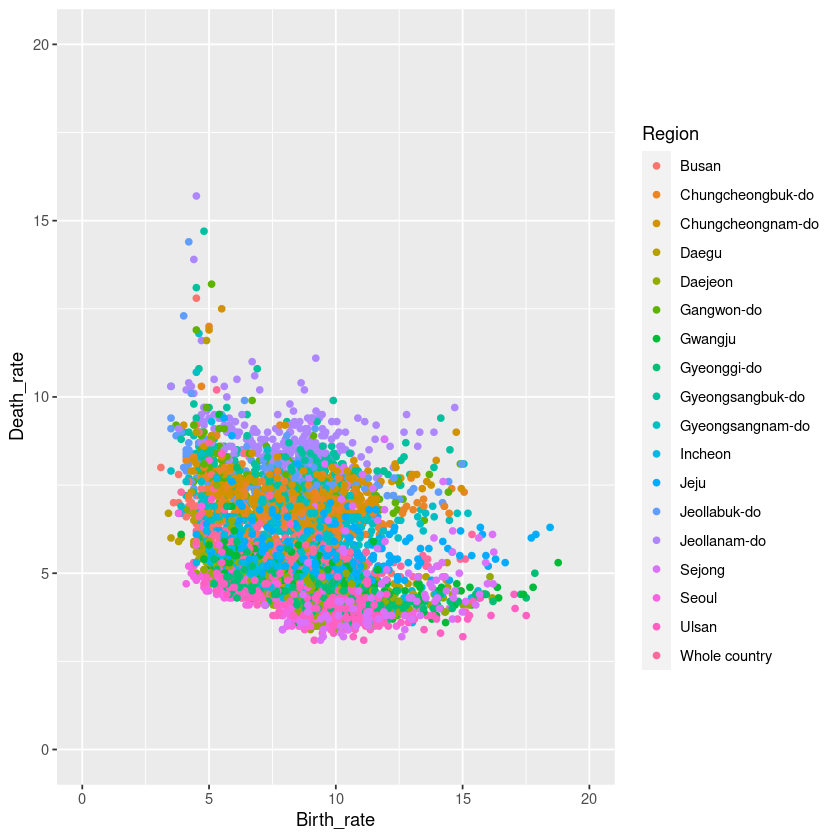

In [5]:
data %>%
	ggplot(aes(x = Birth_rate, y = Death_rate)) +
	geom_point(aes(color = Region)) +
	scale_x_continuous(limits = c(0, 20)) +
	scale_y_continuous(limits = c(0, 20))

Warning message:
“Removed 151 rows containing missing values (geom_point).”


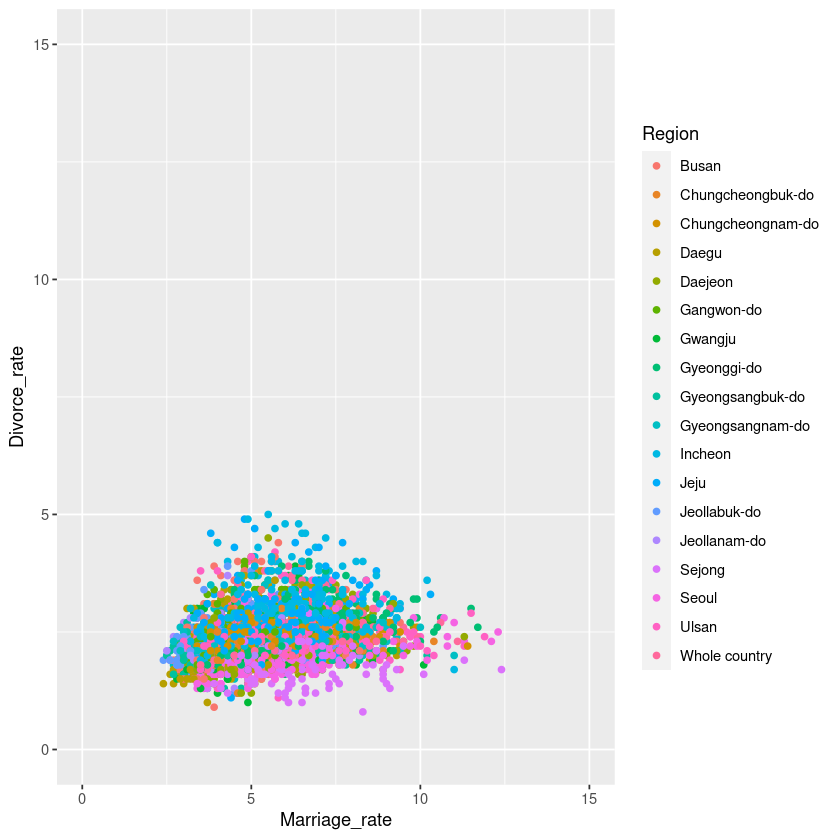

In [11]:
data %>%
	ggplot(aes(x = Marriage_rate, y = Divorce_rate)) +
	geom_point(aes(color = Region)) +
	scale_x_continuous(limits = c(0, 15)) +
	scale_y_continuous(limits = c(0, 15))

Warning message:
“Removed 151 rows containing missing values (geom_col).”


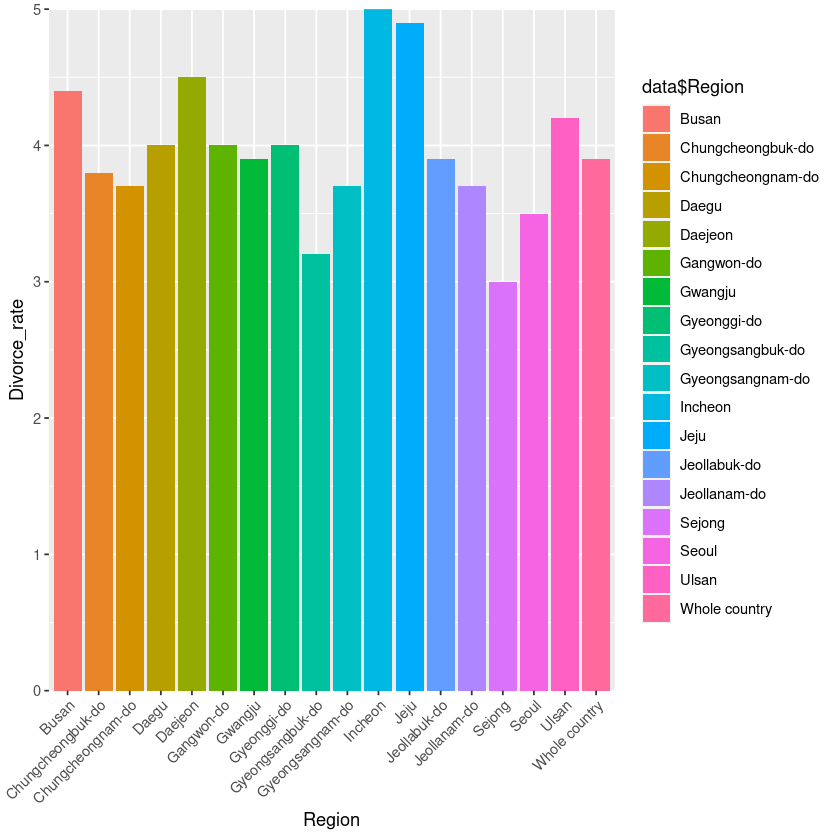

In [6]:
data %>%
	group_by(Region) %>%
	ggplot(aes(x = Region, y = Divorce_rate, fill = data$Region)) +
	geom_col(position = "dodge") +
	scale_y_continuous(expand = c(0, 0)) +
	theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message:
“Removed 151 rows containing missing values (geom_col).”


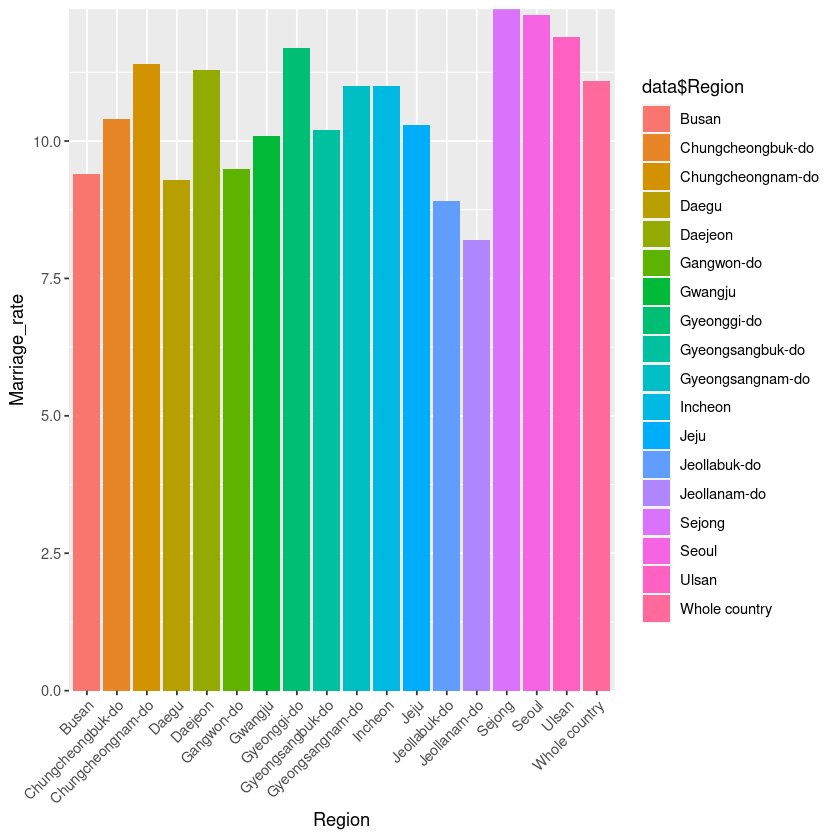

In [13]:
data %>%
	group_by(Region) %>%
	ggplot(aes(x = Region, y = Marriage_rate, fill = data$Region)) +
	geom_col(position = "dodge") +
	scale_y_continuous(expand = c(0, 0)) +
	theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message:
“Removed 151 rows containing missing values (geom_col).”


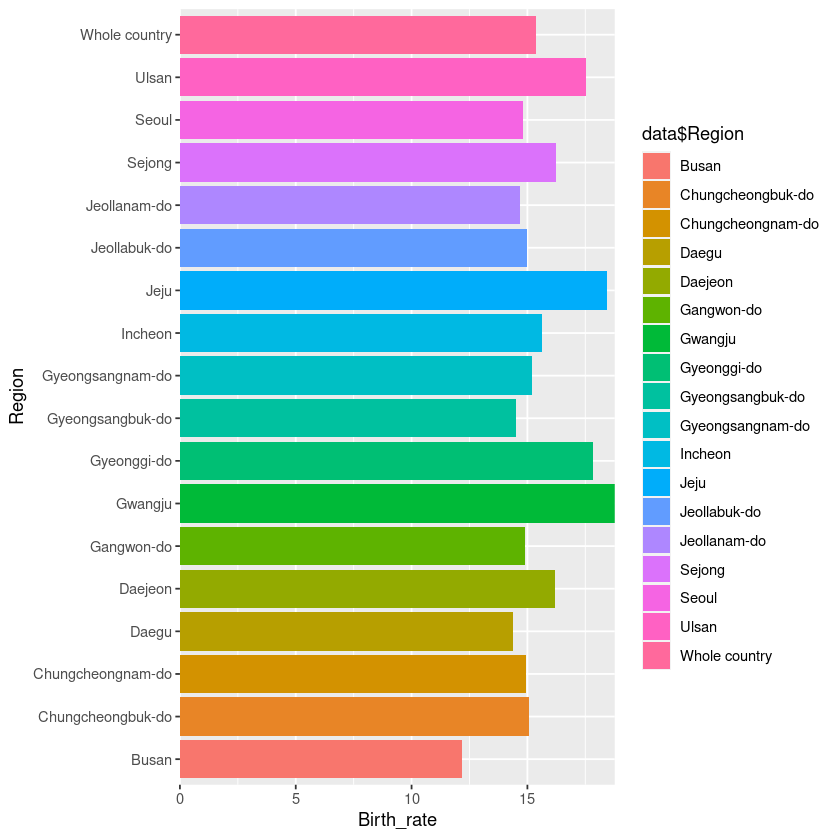

In [15]:
data %>%
	group_by(Region) %>%
	ggplot(aes(x = Region, y = Birth_rate, fill = data$Region)) +
	geom_col(position = "dodge") +
	scale_y_continuous(expand = c(0, 0)) +
	coord_flip()

Warning message:
“Removed 151 rows containing missing values (geom_col).”


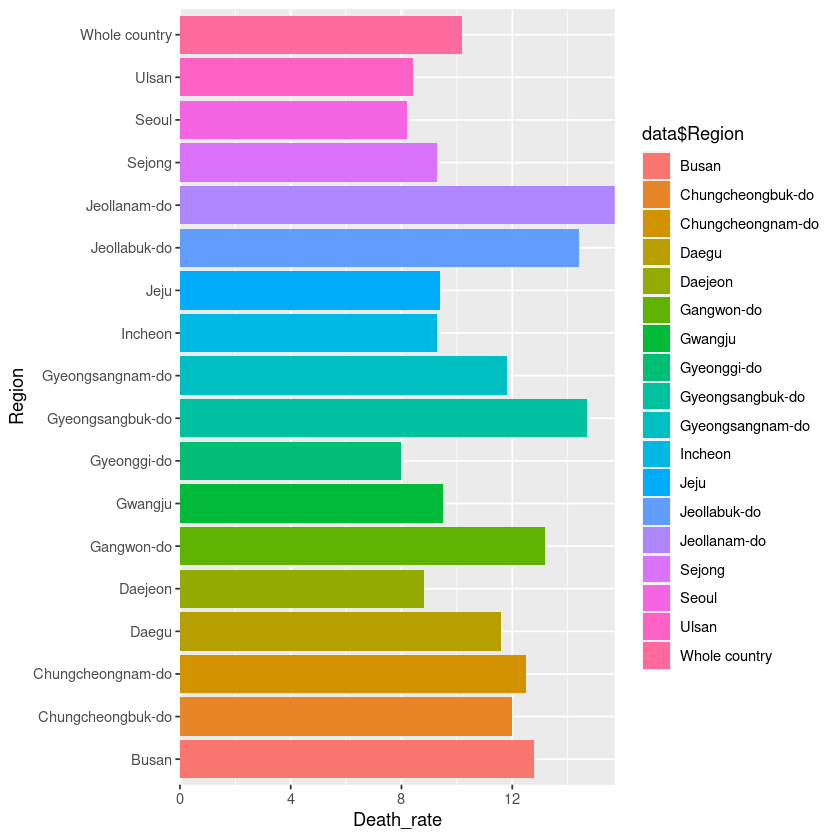

In [16]:
data %>%
	group_by(Region) %>%
	ggplot(aes(x = Region, y = Death_rate, fill = data$Region)) +
	geom_col(position = "dodge") +
	scale_y_continuous(expand = c(0, 0)) +
	coord_flip()

Warning message:
“Removed 211 rows containing missing values (geom_point).”


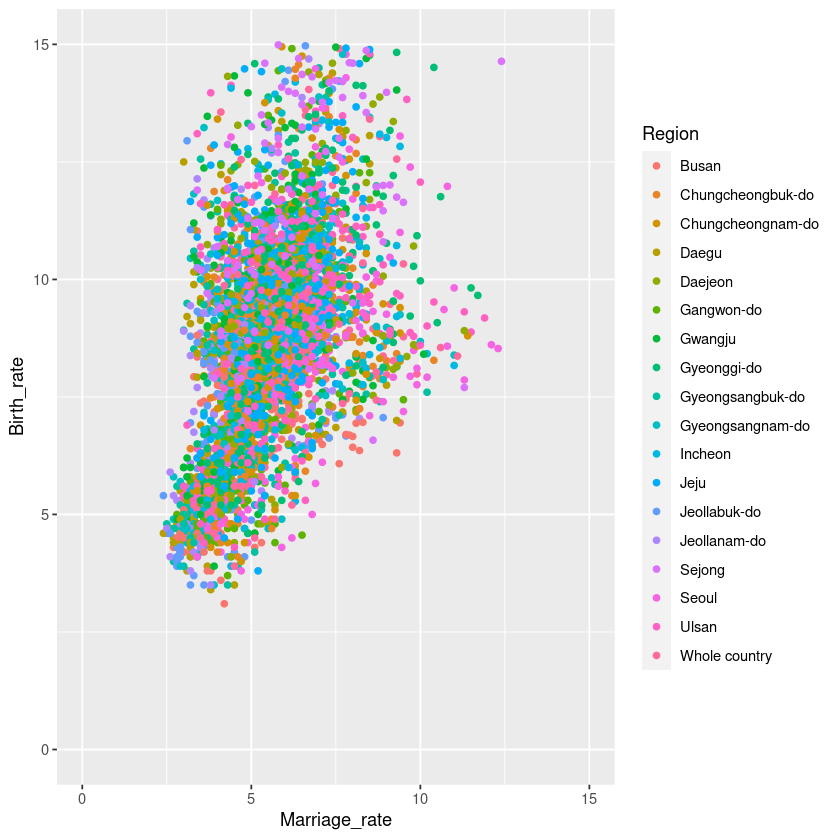

In [17]:
data %>%
	ggplot(aes(x = Marriage_rate, y = Birth_rate)) +
	geom_point(aes(color = Region)) +
	scale_x_continuous(limits = c(0, 15)) +
	scale_y_continuous(limits = c(0, 15))

In [8]:
data %>%
	group_by(Region) %>%
	summarize(mean(Death_rate), mean(Divorce_rate))

Region,mean(Death_rate),mean(Divorce_rate)
<chr>,<dbl>,<dbl>
Busan,5.756296,2.347037
Chungcheongbuk-do,6.791481,2.359259
Chungcheongnam-do,7.244815,2.396296
Daegu,5.090370,2.112593
Daejeon,4.461111,2.275556
Gangwon-do,7.328889,2.470000
Gwangju,4.719259,2.131852
Gyeonggi-do,4.314815,2.536667
Gyeongsangbuk-do,7.863333,2.120741


Rows: 4,860
Columns: 12
$ Date                <date> 2000-01-01, 2000-01-01, 2000-01-01, 2000-01-01, 2…
$ Region              <chr> "Busan", "Chungcheongbuk-do", "Chungcheongnam-do",…
$ Birth               <dbl> 3752, 1903, 2398, 3057, 1859, 1966, 2159, 13527, 3…
$ Birth_rate          <dbl> 11.61, 15.06, 14.75, 14.39, 16.08, 14.91, 18.77, 1…
$ Death               <dbl> 1875, 924, 1466, 1117, 565, 1067, 606, 3770, 2230,…
$ Death_rate          <dbl> 5.8, 7.3, 9.0, 5.3, 4.9, 8.1, 5.3, 5.0, 9.4, 8.1, …
$ Divorce             <dbl> 814, 220, 321, 422, 280, 304, 212, 1931, 406, 577,…
$ Divorce_rate        <dbl> 2.5, 1.7, 2.0, 2.0, 2.4, 2.3, 1.8, 2.5, 1.7, 2.2, …
$ Marriage            <dbl> 2435, 828, 1055, 1577, 868, 817, 932, 5759, 1691, …
$ Marriage_rate       <dbl> 7.5, 6.6, 6.5, 7.4, 7.5, 6.2, 8.1, 7.6, 7.1, 8.0, …
$ Natural_growth      <dbl> 1877, 979, 932, 1940, 1294, 899, 1553, 9757, 1132,…
$ Natural_growth_rate <dbl> 5.8, 7.7, 5.7, 9.1, 11.2, 6.8, 13.5, 12.9, 4.8, 6.…


Warning message:
“Removed 151 rows containing non-finite values (stat_boxplot).”


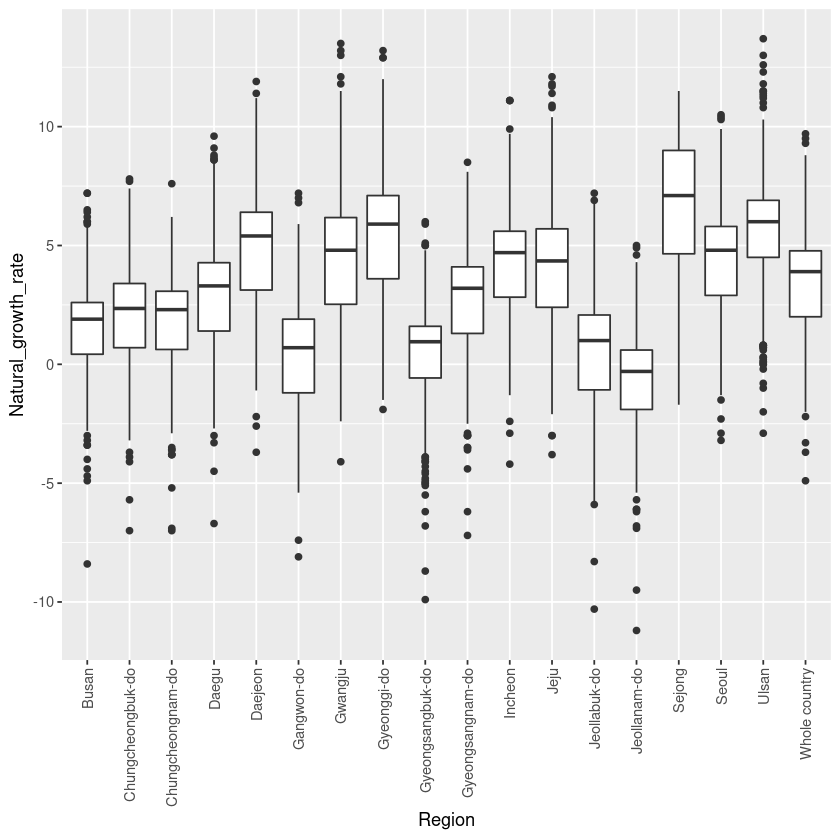

In [9]:
glimpse(data)

data %>%
	group_by(Region) %>%
	ggplot(aes(x = Region, y = Natural_growth_rate)) +
	geom_boxplot() +
	theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

Warning message:
“Removed 144 rows containing missing values (position_stack).”


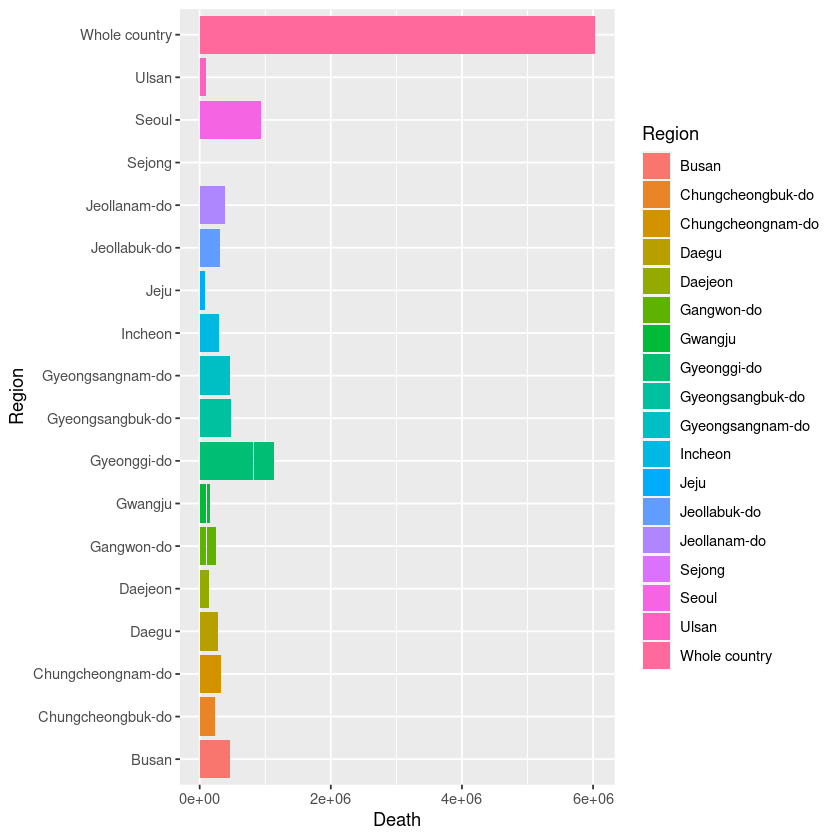

In [10]:
data %>%
	group_by(Region) %>%
	ggplot(aes(x = Region, y = Death, fill = Region)) +
	geom_col() +
	coord_flip()